In [1]:
%pip install --quite -U langgraph


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite


### State

In [9]:
from typing_extensions import TypedDict

class learningState(TypedDict):
    prompt: str

In [23]:
#prompt example

onlineclass: learningState=learningState(prompt='Are you ready for online class? \n')

In [24]:
print(onlineclass)
print(onlineclass['prompt'])

print(onlineclass['prompt'] +' yes,I am ready for online class')
print(onlineclass)

print(type(onlineclass))

{'prompt': 'Are you ready for online class? \n'}
Are you ready for online class? 

Are you ready for online class? 
 yes,I am ready for online class
{'prompt': 'Are you ready for online class? \n'}
<class 'dict'>


In [26]:
#example_2
class LahoreCity(TypedDict):
  prompt:str

In [38]:
statement:LahoreCity=(LahoreCity(prompt="Lahore is famous for historic places \n"))

In [40]:
print(statement)
print(statement['prompt'])

print(statement['prompt']+'Yeah!This is true')


{'prompt': 'Lahore is famous for historic places \n'}
Lahore is famous for historic places 

Lahore is famous for historic places 
Yeah!This is true


### Nodes

In [41]:
def node_1(state: LahoreCity) -> LahoreCity:
    print("---Node 1 State---", state)
    return {"prompt": state['prompt'] +" I am"}

def node_2(state: LahoreCity) -> LahoreCity:
    print("---Node 2 State---", state)
    return {"prompt": state['prompt'] +" happy!"}

### Edges

In [61]:
from IPython.display import Image, display # Preview Graph

from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph # type

# Build graph
builder: StateGraph = StateGraph(state_schema=LahoreCity)

In [62]:
# Nodes
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)

In [63]:
# Simples Edges Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

In [64]:
# Add
graph: CompiledStateGraph = builder.compile()

In [65]:
print(graph)

In [66]:
print(graph.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'node_1': Node(id='node_1', name='node_1', data=node_1(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), 'node_2': Node(id='node_2', name='node_2', data=node_2(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='node_1', data=None, conditional=False), Edge(source='node_1', target='node_2', data=None, conditional=False), Edge(source='node_2', target='__end__', data=None, conditional=False)])


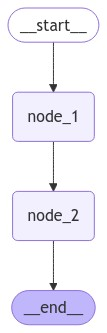

In [67]:
# View
display(Image(graph.get_graph().draw_mermaid_png()))

### Graph Invocation

In [68]:
graph.invoke({"prompt" : "Hi"})

---Node 1 State--- {'prompt': 'Hi'}
---Node 2 State--- {'prompt': 'Hi I am'}


{'prompt': 'Hi I am happy!'}

### Nodes Use LLM == GoogleChatModel in Langchain

In [69]:
%pip install -q -U langchain
%pip install -q -U langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 20.2 MB/s eta 0:00:00


In [73]:
from google.colab import userdata
google_api_key = userdata.get('GEMINI_API_KEY')

In [76]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Initialize an instance of the ChatGoogleGenerativeAI with specific parameters
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",  # Specify the model to use
    api_key=google_api_key,     # Provide the Google API key for authentication
)

In [77]:
# Import the AIMessage class currently will be used for typing
from langchain_core.messages.ai import AIMessage

ai_msg: AIMessage = llm.invoke("Hi?")

In [78]:
print(ai_msg.content)
print(type(ai_msg.content))

Hi! How can I help you today? 

<class 'str'>


In [79]:
from typing_extensions import TypedDict

class FirstLLMAgentCall(TypedDict):
    prompt: str
    output: str

In [80]:
def node_1(state: FirstLLMAgentCall):
    print("---Node 1---", state)
    prompt = state["prompt"]
    ai_msg: AIMessage = llm.invoke(prompt)
    return {"output": ai_msg.content}

In [81]:
zeeshan_bhai_greet_message = node_1(FirstLLMAgentCall(prompt="Hello from UMT"))
print(zeeshan_bhai_greet_message)

---Node 1--- {'prompt': 'Hello from UMT'}
{'output': "Hello from UMT! \n\nIt's great to hear from you.  What can I do for you today? \n"}


In [82]:
from IPython.display import Image, display # Preview Graph

from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph # type

# Build graph
builder: StateGraph = StateGraph(state_schema=FirstLLMAgentCall)

# Define Nodes
builder.add_node("node_1", node_1)

# Add Edges
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# Compile Graph
graph: CompiledStateGraph = builder.compile()

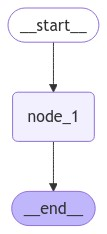

In [83]:
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [84]:
result = graph.invoke({"prompt" : "Motivate me to learn LangGraph"})

---Node 1--- {'prompt': 'Motivate me to learn LangGraph'}


In [85]:
print(result)

{'prompt': 'Motivate me to learn LangGraph', 'output': "## Why Learn LangGraph?\n\nLangGraph is a powerful tool for anyone who wants to **unlock the full potential of language data**. Here's why you should consider learning it:\n\n**1.  The Future of Language Understanding:** \n\n* LangGraph goes beyond traditional NLP techniques. It leverages **knowledge graphs** to create a deeper understanding of language, capturing relationships and context. \n* This allows for **more nuanced analysis**, enabling you to extract insights and solve problems that were previously impossible.\n\n**2.  Versatile Applications:**\n\n* LangGraph can be applied to a wide range of fields, including:\n    * **Sentiment analysis:** Understand the underlying emotions and opinions expressed in text.\n    * **Information extraction:** Automatically extract key information from documents.\n    * **Question answering:** Build intelligent systems that can answer complex questions.\n    * **Text summarization:** Summa

In [86]:
# just another helpter function
import textwrap
from IPython.display import display, Markdown

def to_markdown(text)-> Markdown:
    text : str = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [87]:
print("PROMPT: ", result['prompt'])
to_markdown(result['output'])

PROMPT:  Motivate me to learn LangGraph


> ## Why Learn LangGraph?
> 
> LangGraph is a powerful tool for anyone who wants to **unlock the full potential of language data**. Here's why you should consider learning it:
> 
> **1.  The Future of Language Understanding:** 
> 
> * LangGraph goes beyond traditional NLP techniques. It leverages **knowledge graphs** to create a deeper understanding of language, capturing relationships and context. 
> * This allows for **more nuanced analysis**, enabling you to extract insights and solve problems that were previously impossible.
> 
> **2.  Versatile Applications:**
> 
> * LangGraph can be applied to a wide range of fields, including:
>     * **Sentiment analysis:** Understand the underlying emotions and opinions expressed in text.
>     * **Information extraction:** Automatically extract key information from documents.
>     * **Question answering:** Build intelligent systems that can answer complex questions.
>     * **Text summarization:** Summarize large amounts of text into concise and informative summaries.
>     * **Translation:** Improve machine translation quality by incorporating contextual information.
> 
> **3.  Enhanced Knowledge Representation:**
> 
> * LangGraph allows you to represent complex knowledge in a structured and organized way. 
> * This facilitates **efficient reasoning and discovery**, making it easier to uncover hidden patterns and relationships in your data.
> 
> **4.  Unlocking New Possibilities:**
> 
> * Learning LangGraph opens doors to **exciting new opportunities** in research, development, and innovation.
> * You can contribute to cutting-edge applications in various domains, from healthcare and finance to education and social media.
> 
> **5.  A Growing Community:**
> 
> * LangGraph has a vibrant and supportive community of developers and researchers.
> * This means you can **access resources, learn from others, and collaborate on exciting projects**.
> 
> **The Bottom Line:**
> 
> Learning LangGraph is an investment in your future. It equips you with the skills and knowledge to navigate the rapidly evolving world of language technology and contribute to groundbreaking advancements. 
> 
> **Ready to dive in?** Start exploring the LangGraph documentation, tutorials, and community forums. You'll be amazed by what you can achieve. 
